In [138]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from ggplot import *

import os

import matplotlib.pyplot as plt

# spacy - need visual studio
# pip install spacy 
# python -m spacy download en
# python -m spacy download en_core_web_lg
import spacy

import seaborn as sns

% matplotlib inline

In [2]:
ROOT_DIR = os.path.dirname(os.path.realpath('__file__'))
IMG_DIR_PATH = os.path.join(ROOT_DIR, '..', 'images')
DATA_PATH = os.path.join(ROOT_DIR, '..', 'data')

script_path = os.path.join(DATA_PATH, 'data.csv')

df = pd.read_csv(script_path, encoding='latin-1')

In [3]:
df.shape

(10517, 15)

In [4]:
nlp = spacy.load('en_core_web_lg')

In [16]:
def get_average_meaning_vector(s):
    doc = nlp(s)
    return pd.Series(np.mean([v.vector for v in doc], axis=0))

In [42]:
def top_k_percentile_views_mask(df, k):
    top_k_percent = df['ViewCount'].nlargest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['ViewCount'] > top_k_percent

In [18]:
average_title_df = df['Title'].astype(str).apply(get_average_meaning_vector)

In [21]:
average_desc_df = df['Description'].astype(str).apply(get_average_meaning_vector)

In [43]:
df['Top1'] = top_k_percentile_views_mask(df, 1)
df['Top5'] = top_k_percentile_views_mask(df, 5)
df['Top10'] = top_k_percentile_views_mask(df, 10)

In [50]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(average_title_df)

df['averagetitle-PCA1'] = pca_result[:,0]
df['averagetitle-PCA2'] = pca_result[:,1]
df['averagetitle-PCA3'] = pca_result[:,2]
print ('Explained variation per PCA: {0}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per PCA: 0.2874087117871567


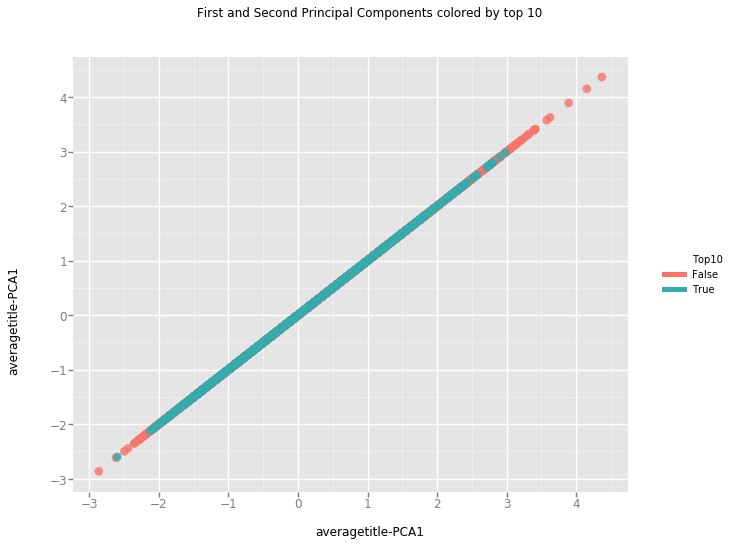

<ggplot: (147171072520)>

In [44]:
chart = ggplot( df, aes(x='averagetitle-PCA1', y='averagetitle-PCA1', color='Top10') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by top 10")
chart

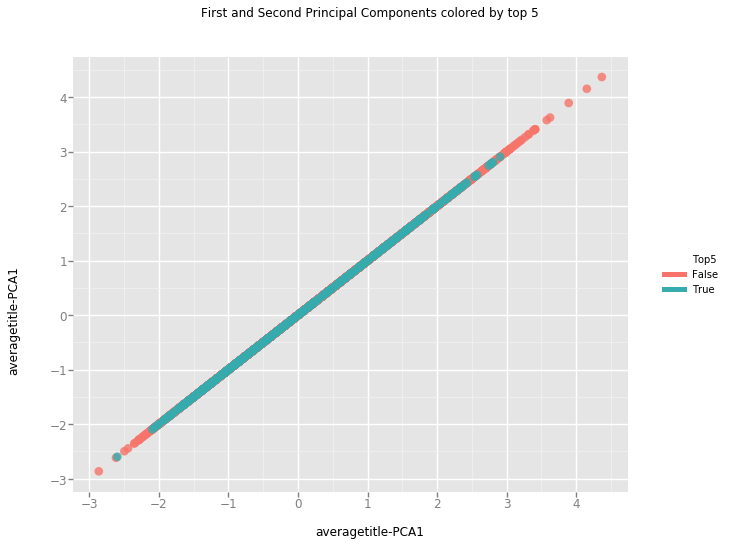

<ggplot: (147253547300)>

In [45]:
chart = ggplot( df, aes(x='averagetitle-PCA1', y='averagetitle-PCA1', color='Top5') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by top 5")
chart

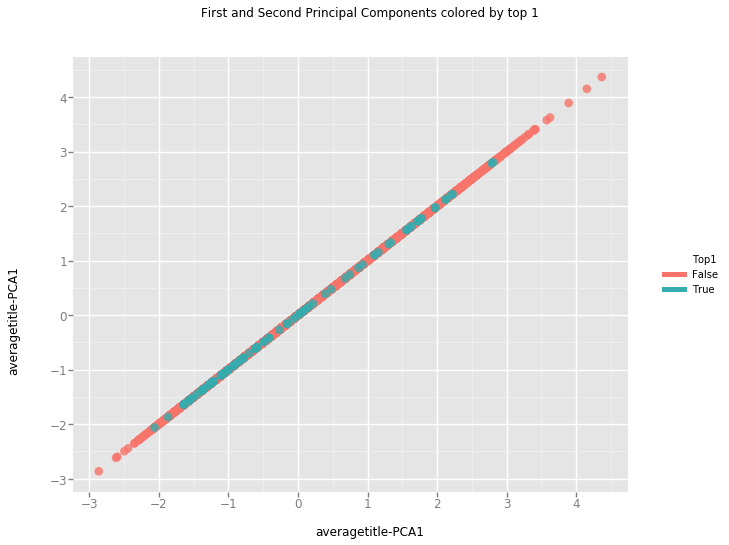

<ggplot: (147243252495)>

In [46]:
chart = ggplot( df, aes(x='averagetitle-PCA1', y='averagetitle-PCA1', color='Top1') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by top 1")
chart

In [160]:
lda = LinearDiscriminantAnalysis(n_components=1)
top_k = 10
top_k_mask = top_k_percentile_views_mask(df, top_k)
lda_results = lda.fit_transform(average_title_df, top_k_mask)

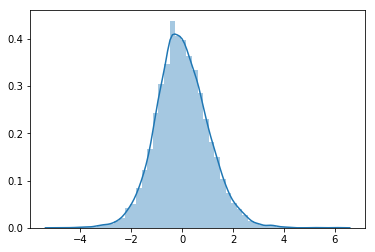

In [161]:
sns.distplot(lda_results)

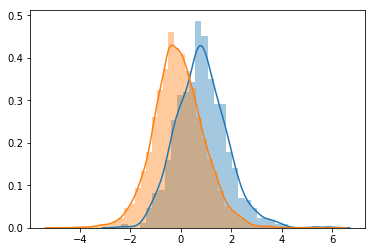

In [162]:
sns.distplot(lda_results[top_k_mask])
sns.distplot(lda_results[~top_k_mask])

In [61]:
pca = PCA(n_components=115)
pca_result = pca.fit_transform(average_title_df)

print ('Explained variation per PCA: {0}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per PCA: 0.8584218563638227


In [82]:
import time

from sklearn.manifold import TSNE

perplexity=50
steps=1000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=steps)
tsne_results = tsne.fit_transform(pca_result)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10517 samples in 0.075s...
[t-SNE] Computed neighbors for 10517 samples in 23.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10517
[t-SNE] Computed conditional probabilities for sample 2000 / 10517
[t-SNE] Computed conditional probabilities for sample 3000 / 10517
[t-SNE] Computed conditional probabilities for sample 4000 / 10517
[t-SNE] Computed conditional probabilities for sample 5000 / 10517
[t-SNE] Computed conditional probabilities for sample 6000 / 10517
[t-SNE] Computed conditional probabilities for sample 7000 / 10517
[t-SNE] Computed conditional probabilities for sample 8000 / 10517
[t-SNE] Computed conditional probabilities for sample 9000 / 10517
[t-SNE] Computed conditional probabilities for sample 10000 / 10517
[t-SNE] Computed conditional probabilities for sample 10517 / 10517
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.435997
[t-SNE] E

In [83]:
df_tsne = df[['ViewCount']].copy()
df_tsne['tsne-1'] = tsne_results[:,0]
df_tsne['tsne-2'] = tsne_results[:,1]

In [84]:
df_tsne['Top1'] = top_k_percentile_views_mask(df_tsne, 1)
df_tsne['Top5'] = top_k_percentile_views_mask(df_tsne, 5)
df_tsne['Top10'] = top_k_percentile_views_mask(df_tsne, 10)

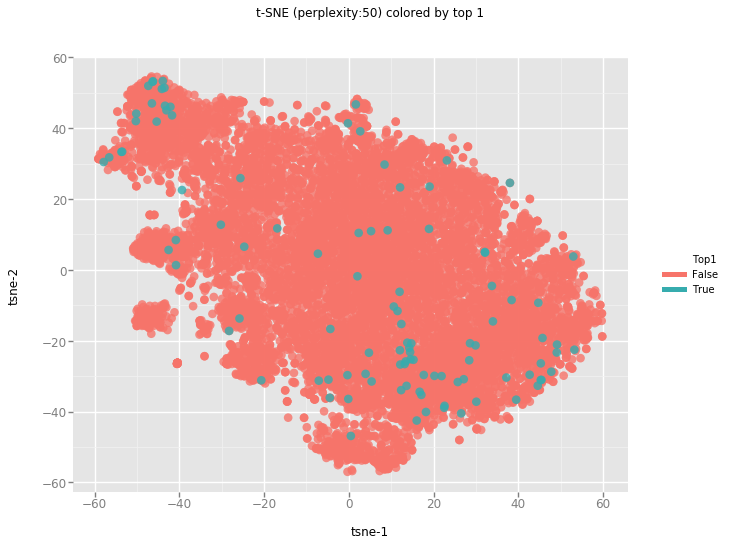

<ggplot: (147257078704)>

In [85]:
chart = ggplot( df_tsne, aes(x='tsne-1', y='tsne-2', color='Top1') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("t-SNE (perplexity:{0}) colored by top 1".format(perplexity))
chart

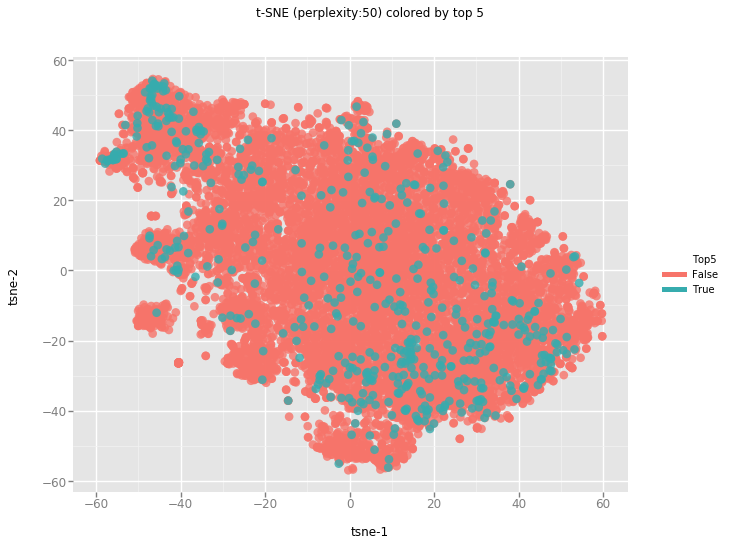

<ggplot: (147257051817)>

In [86]:
chart = ggplot( df_tsne, aes(x='tsne-1', y='tsne-2', color='Top5') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("t-SNE (perplexity:{0}) colored by top 5".format(perplexity))
chart

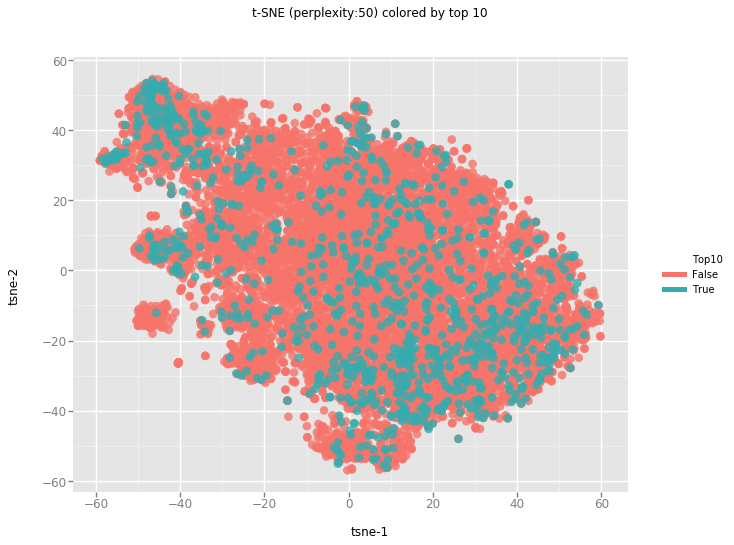

<ggplot: (147243638634)>

In [87]:
chart = ggplot( df_tsne, aes(x='tsne-1', y='tsne-2', color='Top10') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("t-SNE (perplexity:{0}) colored by top 10".format(perplexity))
chart

In [179]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.65, min_samples=5, n_jobs=-1).fit(average_title_df)

In [180]:
pd.Series(db.labels_).value_counts()

-1     7498
 0     2931
 11      24
 6        6
 3        6
 7        5
 13       5
 12       5
 4        5
 10       5
 2        5
 9        5
 1        5
 14       4
 5        4
 8        4
dtype: int64

In [181]:
pd.Series(db.labels_[df['Top10']]).value_counts()

-1    720
 0    322
 1      2
 8      1
 6      1
 5      1
 4      1
 3      1
 2      1
dtype: int64

In [183]:
df_tsne['Cluster'] = db.labels_

In [186]:
df_tsne['Cluster'].value_counts()

-1     7498
 0     2931
 11      24
 6        6
 3        6
 7        5
 13       5
 12       5
 4        5
 10       5
 2        5
 9        5
 1        5
 14       4
 5        4
 8        4
Name: Cluster, dtype: int64

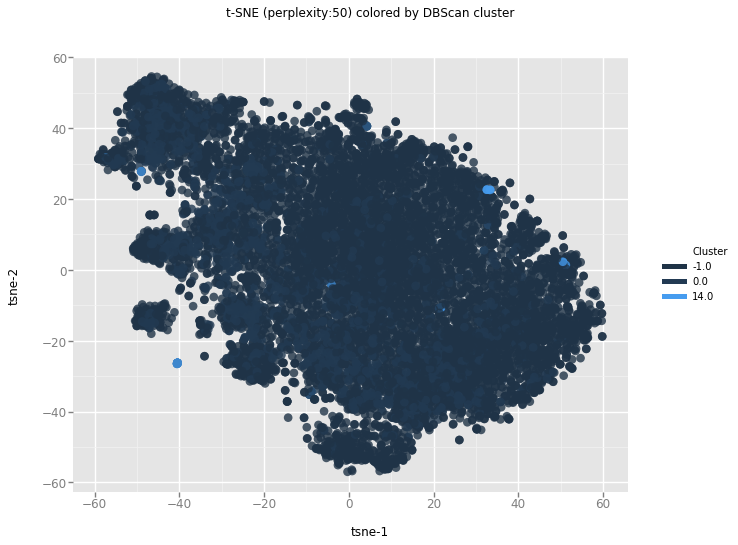

<ggplot: (-9223371889587394588)>

In [184]:
chart = ggplot( df_tsne, aes(x='tsne-1', y='tsne-2', color='Cluster') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("t-SNE (perplexity:{0}) colored by DBScan cluster".format(perplexity))
chart